# Analysis of Crime Rate in Houston, USA
 Dataset : http://www.houstontx.gov/police/cs/crime-stats-archives.htm <br>
 Time : January 2018

### Goals : Answeer questions in the following
1. Which one is the highly committed crime in Houston?
2. Do some offences tend to occur more frequently in particular hours in a day?
3. Are there any crime in specific days of week?

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import calendar
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df=pd.read_excel("C://Users/Admin/Desktop/Presentation for Simulation/Crime Rate/jan18.xls")
df.head(5)

,Date,Hour,Offense Type,Beat,Premise,Block Range,Street Name,Type,Suffix,Offenses
0,01/01/2018,18,Robbery,10H10,"Field, Woods, Forest, Park",200-299,LENOX,-,-,1
1,01/01/2018,18,Theft,10H10,"Road, Street, or Sidewalk",3700-3799,HOUSTON LAKE,DR,-,1
2,01/02/2018,14,Theft,10H10,Auto Repair,16700-16799,EASTEX,-,-,1
3,01/04/2018,8,Burglary,10H10,Auto Repair,4700-4799,HARRISBURG,BLVD,-,1
4,01/04/2018,18,Theft,10H10,Department or Discount Store,5100-5199,HARRISBURG,BLVD,-,1


In [12]:
df.columns

Index(['Date', 'Hour', 'Offense Type', 'Beat', 'Premise', 'Block Range',
       'Street Name', 'Type', 'Suffix', 'Offenses'],
      dtype='object')

## Modify data : 
- Caculate House Number : calculate as avarage number of block range
- Add columns for happen time of crime events : Hour, Day of Week 

In [14]:
houseno = df['Block Range'].str.extract('(?P<start_addr>\d+)-(?P<end_addr>\d+)', expand=False)
df['HouseNo'] = (houseno.start_addr.astype(float) + houseno.end_addr.astype(float) + 1.0) / 2
df['HouseNo'] = df['HouseNo'].fillna(50.0)
df['Address'] = df.HouseNo.astype(int).map(str) + ' ' + df['Street Name'].map(str) + ' '+ ', Houston, TX'

df = df.rename(columns={'Offense Type' : 'Category'})
df['Hour'] =df['Hour'].apply(lambda x : int(float(x.replace("'", ""))) if type(x) == str else int(float(x)))


df['DayOfWeek']=  pd.to_datetime(df['Date'], format='%m/%d/%Y').dt.weekday_name  
df = df.rename(columns={'# offenses' : 'Offenses'})
analysis = df[['Date', 'Hour', 'DayOfWeek', 'Category', 'Offenses', 'Beat', 'Address']]
print("Dimension of data",analysis.shape)
analysis.head()

Dimension of data (9882, 7)


,Date,Hour,DayOfWeek,Category,Offenses,Beat,Address
0,01/01/2018,18,Monday,Robbery,1,10H10,"250 LENOX , Houston, TX"
1,01/01/2018,18,Monday,Theft,1,10H10,"3750 HOUSTON LAKE , Houston, TX"
2,01/02/2018,14,Tuesday,Theft,1,10H10,"16750 EASTEX , Houston, TX"
3,01/04/2018,8,Thursday,Burglary,1,10H10,"4750 HARRISBURG , Houston, TX"
4,01/04/2018,18,Thursday,Theft,1,10H10,"5150 HARRISBURG , Houston, TX"


# Ovierview crime situation 

## Which one is the highly committed crime in Houston?

In [32]:
groups= analysis.drop_duplicates().groupby('Category')['Offenses'].count()
groups.sort_values(ascending=False)

Category
Theft                 5480
Burglary              1544
AutoTheft              920
Robbery                908
Aggravated Assault     903
Rape                    91
Murder                  24
Name: Offenses, dtype: int64

Text(0, 0.5, 'Number of Crime')

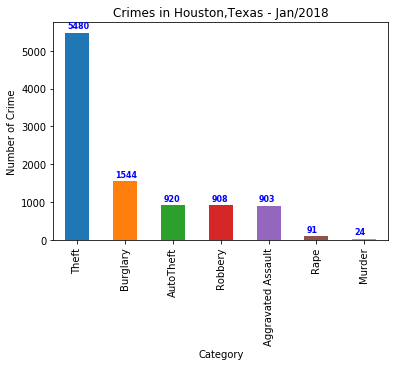

In [16]:
# Visuliazation of crime as category
groups = groups.sort_values(ascending=False)
plt.figure()
for i, v in enumerate(groups.values):
 	plt.text (i-0.2 ,v + 115, str(v),  fontsize=8,color='blue', fontweight='bold')
groups.plot(kind='bar', title="Crimes in Houston,Texas - Jan/2018")
plt.ylabel('Number of Crime')

## Are there any crime in specific days of week?

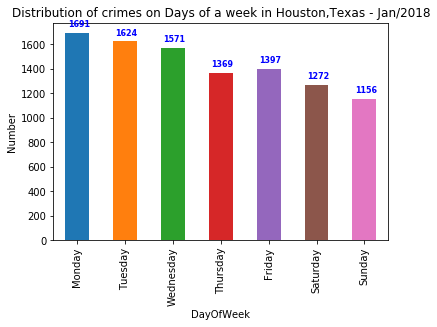

In [17]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
groupsPerDay = analysis.groupby("DayOfWeek")["Offenses"].sum()
groupsPerDay = groupsPerDay.sort_values(ascending=False)
groupsPerDay=groupsPerDay[weekdays]
plt.figure()
for i, v in enumerate(groupsPerDay.values):
 	plt.text (i-0.2 ,v + 50, str(v),  fontsize=8,color='blue', fontweight='bold')
plt.ylabel('Number')
plt.xlabel("Day of Week")
groupsPerDay.plot(kind='bar', title="Distribution of crimes on Days of a week in Houston,Texas - Jan/2018")


## Do some offences tend to occur more frequently in particular hours in a day?

### Which crime occur frequently during the day-time ?

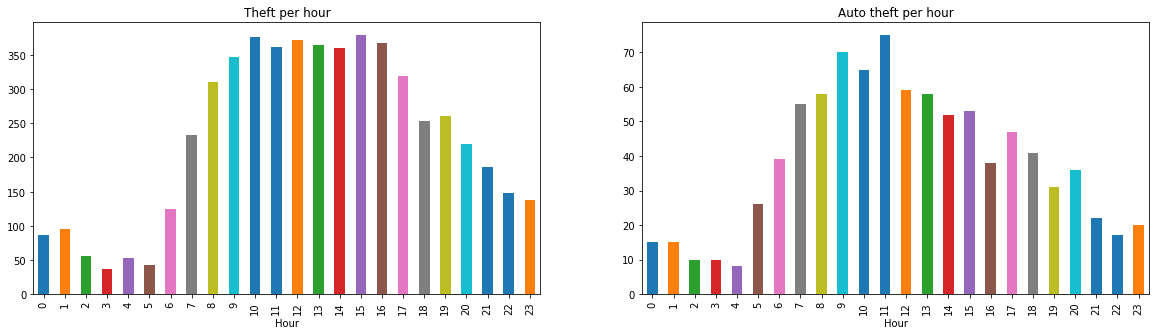

In [29]:
fig, axs = plt.subplots(1,2)
hours = [x for x in range(24)]
df_theft = analysis[analysis.Category == "Theft"]
gr_theft = df_theft.groupby("Hour")["Category"].count()
gr_theft = gr_theft[hours]

df_burglary = df[analysis.Category == "AutoTheft"]
gr_burglary = df_burglary.groupby("Hour")["Category"].count()
gr_burglary = gr_burglary[hours]

gr_theft.plot(kind="bar", title="Theft per hour", ax=axs[0])
gr_burglary.plot(kind="bar", title="Auto theft per hour", ax=axs[1], figsize=(20, 5))

 ### Aggravated Assault occur frequently from noon to night 

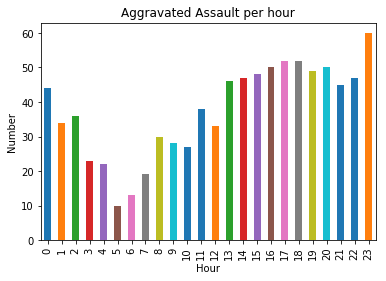

In [30]:
asDay = analysis[analysis.Category == "Aggravated Assault"]
aDay = asDay.groupby("Hour")["Category"].count()
aDay = aDay[hours]
plt.ylabel('Number')
aDay.plot(kind="bar", title="Aggravated Assault per hour")


## Robbery occur frequently in the evening

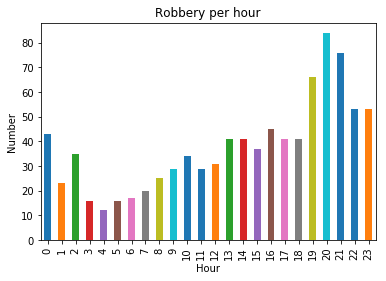

In [28]:

asDay = analysis[analysis.Category == "Robbery"]
aDay = asDay.groupby("Hour")["Category"].count()
aDay = aDay[hours]
plt.ylabel('Number')
aDay.plot(kind="bar", title="Robbery per hour")